In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Fonctions triangle de Pascal

La fonction pascal calcule et retourne un triangle de hauteur nbLigne + 1.

La fonction lignePascal récupère la dernière ligne du triangle de Pascal de hauteur nbLigne+1.

La fonction affichePascal permet d'afficher un triangle de Pascal.

In [17]:
def pascal(nbLigne):
  list = []
  for n in range(nbLigne + 1):
    list.append([])
    list[n].append(1)
    for m in range(1, n):
        list[n].append(list[n - 1][m - 1] + list[n - 1][m])
    if(nbLigne != 0):
      list[n].append(1)
  return list

def lignePascal(nbLigne):
  triangle = pascal(nbLigne)
  return triangle[len(triangle)-1]

def affichePascal(liste):
  for n in range(len(liste)):
      for m in range(0, n + 1):
          print('{0:5}'.format(liste[n][m]), end = " ", sep = " ")
      print()

In [18]:
triangle = lignePascal(3)
print(triangle)

[1, 3, 3, 1]


In [19]:
affichePascal(pascal(3))

    1 
    1     1 
    1     2     1 
    1     3     3     1 


# Fonctions Courbe de Bézier
La fonction bernstain retourne la liste des polynômes de Bernstain Bi^n = (Ci^n)\*(u^i)*(1-u)^n-1.

La fonction polynome retourne la somme des produits des polynômes de Bernstain par les coordonnées des points de contrôle Pi (elle retourne une somme pour les coordonnées en X et une pour les coordonnées en Y).

La fonction courbe retourne les points de la courbe de Bézier.

La fonction bezierCubeMorceau appelle plusieurs fois la fonction courbe afin de mettre en oeuvre Bézier cubique par morceaux.

In [20]:
def bernstain(u, n):
  triangle = lignePascal(n)
  liBernstain = []
  for i in range(n+1):
    liBernstain.append(1)
    liBernstain[i] = triangle[i]*(u**i)*((1-u)**(n-i))
  return liBernstain

In [21]:
def polynome(u,n, coordX, coordY):
  listeBern = bernstain(u, n)
  sommeX = 0
  sommeY = 0
  for i in range(n+1):
    sommeX = sommeX + listeBern[i]*coordX[i]
    sommeY = sommeY + listeBern[i]*coordY[i]
  return sommeX, sommeY

In [22]:
def courbe(n, ctrlX, ctrlY):
  resX = []
  resY = []
  for i in np.arange(0, 1, 0.01):
    x, y = polynome(i, n, ctrlX, ctrlY)
    resX.append(x)
    resY.append(y)
  return resX, resY

In [23]:
def bezierCubeMorceau(ctrlX, ctrlY):
  resX = []
  resY = []
  for i in range(len(ctrlX)):
    x, y = courbe(len(ctrlX[0])-1, ctrlX[i], ctrlY[i])
    resX = resX+x
    resY = resY+y
  return resX, resY

Tests Bézier

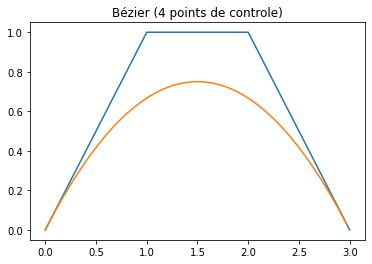

In [24]:
# test Bézier (4 points de controle)
ctrlX = [0, 1, 2, 3]
ctrlY = [0, 1, 1, 0]
plt.plot(ctrlX, ctrlY)
resX, resY = courbe(len(ctrlX)-1, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier (4 points de controle)")
plt.show()

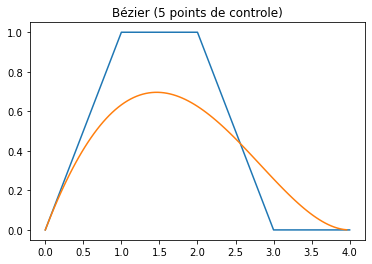

In [25]:
# test Bézier (5 points de controle)
ctrlX = [0, 1, 2, 3, 4]
ctrlY = [0, 1, 1, 0, 0]
plt.plot(ctrlX, ctrlY)
resX, resY = courbe(len(ctrlX)-1, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier (5 points de controle)")
plt.show()

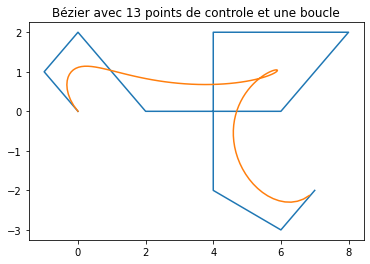

In [26]:
# test Bézier avec 13 points de controle et une boucle
ctrlX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
ctrlY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
plt.plot(ctrlX, ctrlY)
resX, resY = courbe(len(ctrlX)-1, ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier avec 13 points de controle et une boucle")
plt.show()

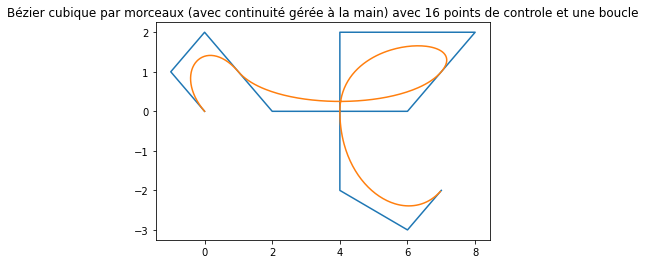

In [27]:
# test Bézier cubique par morceaux (avec continuité gérée à la main) avec 16 points de controle et une boucle
ctrlX = [[0, -1, 0, 1], [1, 2, 6, 7], [7, 8, 4, 4], [4, 4, 6, 7]]
ctrlY = [[0, 1, 2, 1], [1, 0, 0, 1], [1, 2, 2, 0], [0, -2, -3, -2]]
affX = [0, -1, 0, 1, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 6, 7]
affY = [0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, -2, -3, -2]
plt.plot(affX, affY)
resX, resY = bezierCubeMorceau(ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier cubique par morceaux (avec continuité gérée à la main) avec 16 points de controle et une boucle")
plt.show()

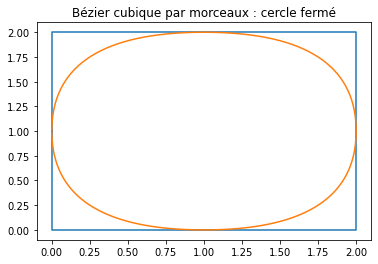

In [28]:
# test Bézier cubique par morceaux : cercle fermé
ctrlX = [[0, 0, 1], [1, 2, 2], [2, 2, 1], [1, 0, 0]]
ctrlY = [[1, 2, 2], [2, 2, 1], [1, 0, 0], [0, 0, 1]]
affX = [0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0]
affY = [1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1]
plt.plot(affX, affY)
resX, resY = bezierCubeMorceau(ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier cubique par morceaux : cercle fermé")
plt.show()

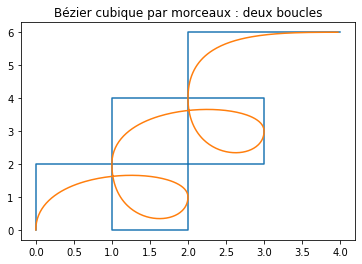

In [29]:
# test Bézier cubique par morceaux : deux boucles
ctrlX = [[0, 0, 2, 2], [2, 2, 1, 1], [1, 1, 3, 3], [3, 3, 2, 2], [2, 2, 3, 4]]
ctrlY = [[0, 2, 2, 1], [1, 0, 0, 2], [2, 4, 4, 3], [3, 2, 2, 4], [4, 6, 6, 6]]
affX = [0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4]
affY = [0, 2, 2, 1, 1, 0, 0, 2, 2, 4, 4, 3, 3, 2, 2, 4, 4, 6, 6, 6]
plt.plot(affX, affY)
resX, resY = bezierCubeMorceau(ctrlX, ctrlY)
plt.plot(resX, resY)
plt.title("Bézier cubique par morceaux : deux boucles")
plt.show()